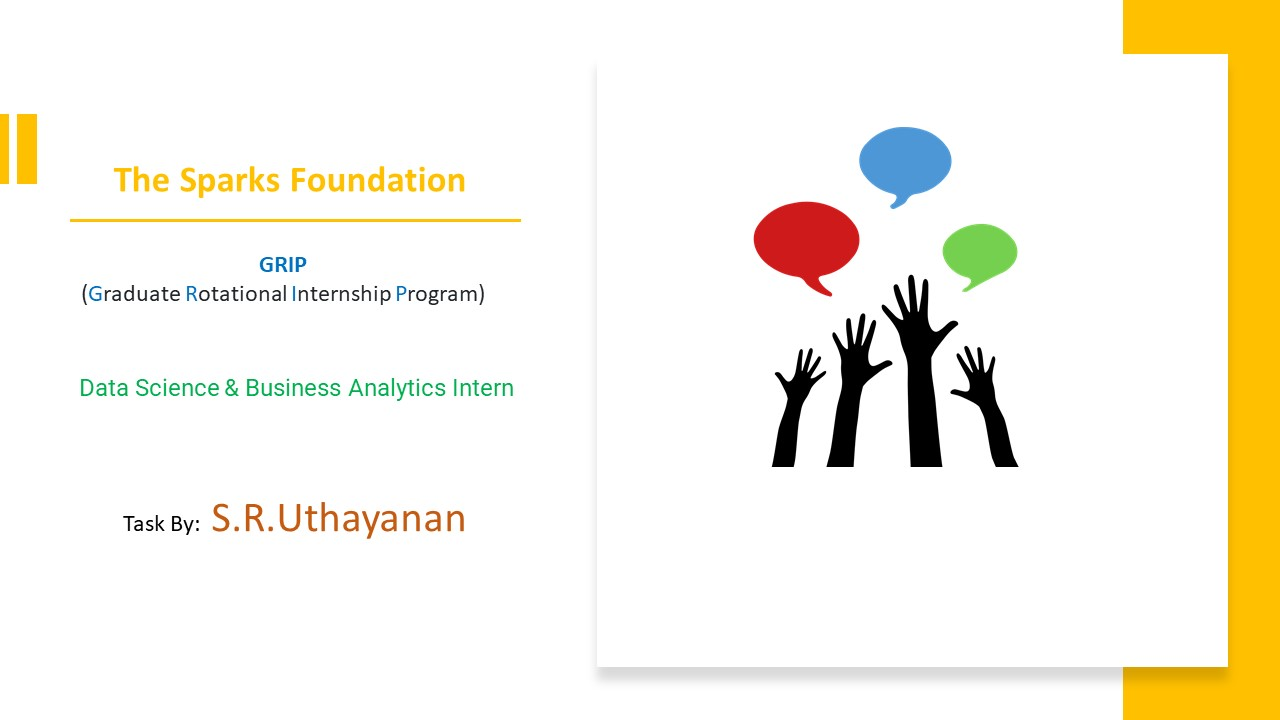

# Task-7: Stock Market Prediction using Numerical and Textual Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-Stock-Price-Dataset" data-toc-modified-id="Importing-the-Stock-Price-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing the Stock Price Dataset</a></span><ul class="toc-item"><li><span><a href="#Visualize-the-stock’s-daily-closing-price" data-toc-modified-id="Visualize-the-stock’s-daily-closing-price-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Visualize the stock’s daily closing price</a></span></li><li><span><a href="#Test-for-staionarity" data-toc-modified-id="Test-for-staionarity-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Test for staionarity</a></span><ul class="toc-item"><li><span><a href="#ADF-(Augmented-Dickey-Fuller)-Test" data-toc-modified-id="ADF-(Augmented-Dickey-Fuller)-Test-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>ADF (Augmented Dickey-Fuller) Test</a></span></li></ul></li><li><span><a href="#Decompose" data-toc-modified-id="Decompose-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Decompose</a></span></li><li><span><a href="#split-data-into-train-and-training-set" data-toc-modified-id="split-data-into-train-and-training-set-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>split data into train and training set</a></span><ul class="toc-item"><li><span><a href="#Visualisation-of-Train-Test-Data" data-toc-modified-id="Visualisation-of-Train-Test-Data-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Visualisation of Train Test Data</a></span></li></ul></li><li><span><a href="#Auto-ARIMA:-Automatically-discover-the-optimal-order-for-an-ARIMA-model." data-toc-modified-id="Auto-ARIMA:-Automatically-discover-the-optimal-order-for-an-ARIMA-model.-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Auto ARIMA: Automatically discover the optimal order for an ARIMA model.</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Accuracy-metrics-for-evaluating-forecast-results:" data-toc-modified-id="Accuracy-metrics-for-evaluating-forecast-results:-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Accuracy metrics for evaluating forecast results:</a></span></li></ul></li><li><span><a href="#Textual-Data-Analysis" data-toc-modified-id="Textual-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Textual Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Extracting-data-from-year-2015" data-toc-modified-id="Extracting-data-from-year-2015-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Extracting data from year 2015</a></span></li></ul></li><li><span><a href="#Merge-'BSE-Stock-price-data'--and-'News-text-Data" data-toc-modified-id="Merge-'BSE-Stock-price-data'--and-'News-text-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Merge 'BSE Stock price data'  and 'News text Data</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature Engineering</a></span></li></ul></li><li><span><a href="#Preparing-the-dataset-for-Machine-Learning" data-toc-modified-id="Preparing-the-dataset-for-Machine-Learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preparing the dataset for Machine Learning</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Finalizing-the-Model" data-toc-modified-id="Finalizing-the-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Finalizing the Model</a></span></li></ul></li></ul></div>

__Problem Statement__

Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentimental analysis of news headlines.

__Import Packages:__

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [24]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Uthayanan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Uthayanan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

from scipy import stats

from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.tree import export_graphviz

## Importing the Stock Price Dataset

In [2]:
import yfinance as yf

In [126]:
stock_data = yf.download('^BSESN', start='2015-01-01', end='2019-12-31')

[*********************100%***********************]  1 of 1 completed


In [127]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


__Data Exploration: Understanding the Stock Price Dataset__

In [128]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1224 entries, 2015-01-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1224 non-null   float64
 1   High       1224 non-null   float64
 2   Low        1224 non-null   float64
 3   Close      1224 non-null   float64
 4   Adj Close  1224 non-null   float64
 5   Volume     1224 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 66.9 KB


In [129]:
bse_data = stock_data.copy()

In [130]:
bse_data.reset_index(inplace=True)

In [131]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1224 non-null   datetime64[ns]
 1   Open       1224 non-null   float64       
 2   High       1224 non-null   float64       
 3   Low        1224 non-null   float64       
 4   Close      1224 non-null   float64       
 5   Adj Close  1224 non-null   float64       
 6   Volume     1224 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.1 KB


In [132]:
bse_data.shape

(1224, 7)

### Visualize the stock’s daily closing price

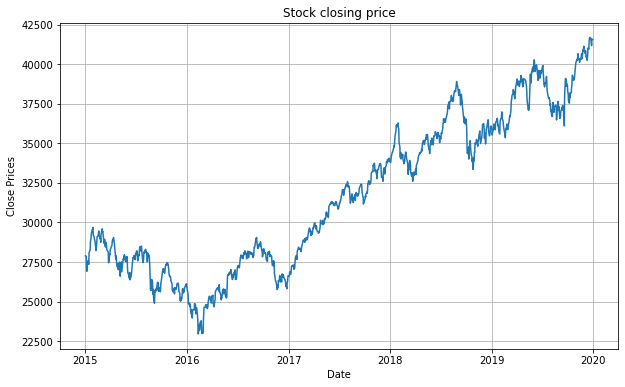

In [10]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('Stock closing price')
plt.show()

### Test for staionarity

#### ADF (Augmented Dickey-Fuller) Test

One of the most widely used statistical tests is the Dickey-Fuller test. It can be used to determine whether or not a series has a unit root, and thus whether or not the series is stationary. This test’s null and alternate hypotheses are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If the null hypothesis is not rejected, the series is said to be non-stationary. The series can be linear or difference stationary as a result of this.

The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance).

In [11]:
df_close = stock_data['Close']

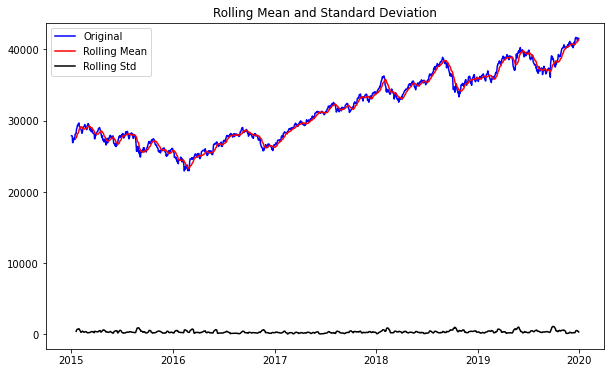

Results of dickey fuller test
Test Statistics                   0.048272
p-value                           0.962347
No. of lags used                 10.000000
Number of observations used    1213.000000
critical value (1%)              -3.435752
critical value (5%)              -2.863926
critical value (10%)             -2.568040
dtype: float64


In [12]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(10,6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

The increasing mean and standard deviation may be seen in the graph above, indicating that our series isn’t stationary.

We can’t rule out the Null hypothesis because the p-value is bigger than 0.05. Additionally, the test statistics exceed the critical values. As a result, the data is nonlinear.

Seasonality and trend may need to be separated from our series before we can undertake a time series analysis. This approach will cause the resulting series to become stagnant.

Let’s isolate the time series from the Trend and Seasonality.

### Decompose

To separate the trend and the seasonality from a time series, 
we can decompose the series using the following code.

<Figure size 432x288 with 0 Axes>

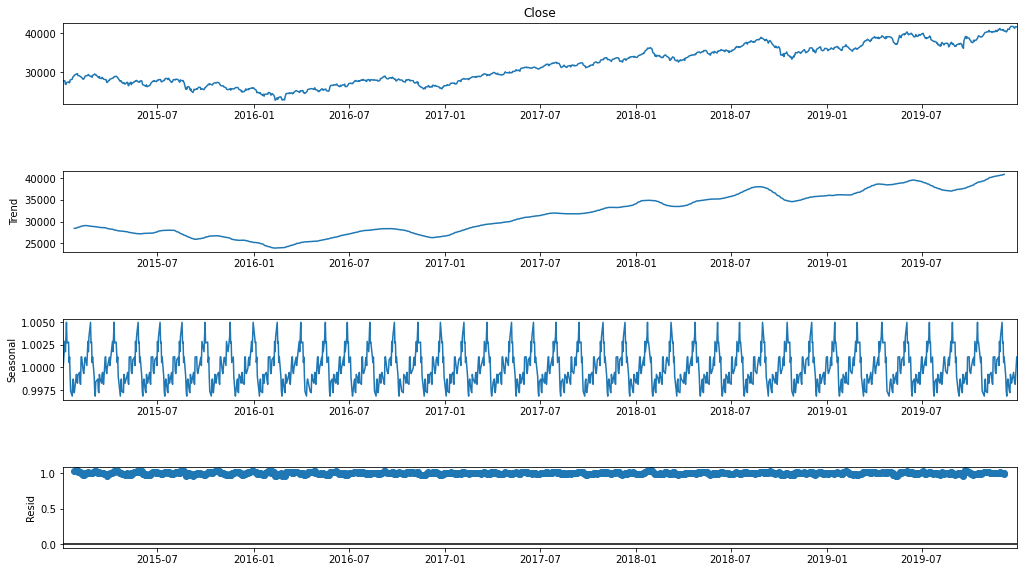

In [13]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

To reduce the magnitude of the values and the growing trend in the series,we first take a log of the series. 

We then calculate the rolling average of the series after obtaining the log of the series. 

A rolling average is computed by taking data from the previous 12 months and calculating a mean consumption value at each subsequent point in the series.

No handles with labels found to put in legend.


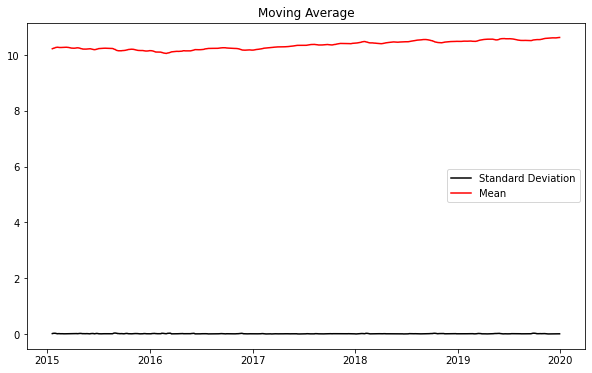

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

### split data into train and training set

In [15]:
train_data, test_data = df_log[3:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]

In [16]:
train_data.shape, test_data.shape

((976,), (245,))

#### Visualisation of Train Test Data

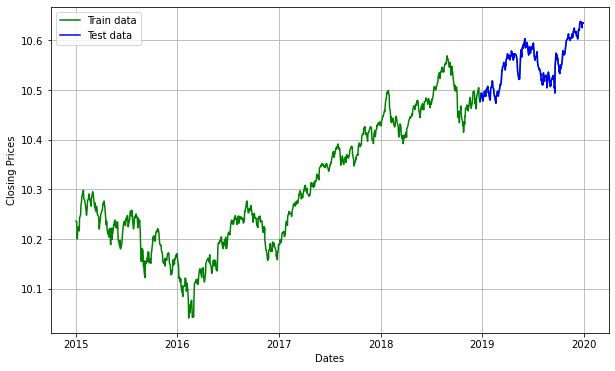

In [17]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

### Auto ARIMA: Automatically discover the optimal order for an ARIMA model.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6539.271, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6540.330, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6540.359, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6540.112, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6538.421, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6538.401, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6536.366, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6541.322, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6539.361, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-6539.293, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6541.298, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-6537.341, Time=0.14 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.874 seconds
                               SARIMAX Results                              

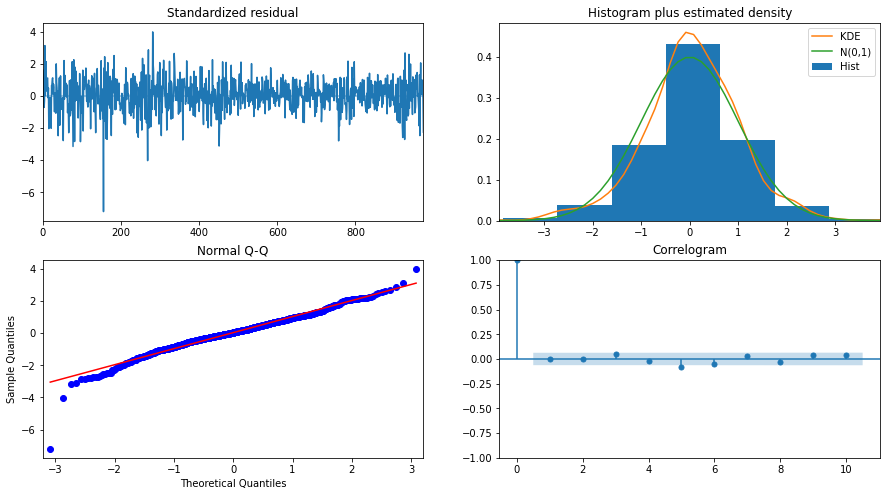

In [18]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

- The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

- The density plot on the top right suggests a normal distribution with a mean of zero

- The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

- The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

### Modeling

In [19]:
model = ARIMA(train_data, order=(0,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  975
Model:                 ARIMA(0, 1, 1)   Log Likelihood                3273.181
Method:                       css-mle   S.D. of innovations              0.008
Date:                Mon, 06 Dec 2021   AIC                          -6540.363
Time:                        09:34:49   BIC                          -6525.715
Sample:                             1   HQIC                         -6534.789
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      1.019      0.308      -0.000       0.001
ma.L1.D.Close     0.0569      0.032      1.758      0.079      -0.007       0.120
                                    Root

C:\Users\Uthayanan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Uthayanan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Let’s now begin forecasting stock prices on the test dataset with a 95% confidence level.

In [20]:
# Forecast
fc, se, conf = fitted.forecast(245, alpha=0.05)  # 95% confidence level

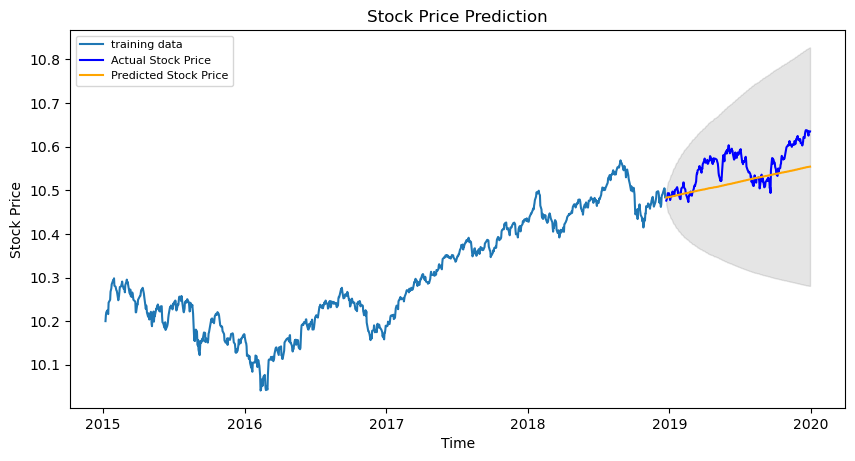

In [21]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Accuracy metrics for evaluating forecast results:

In [22]:
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.002161937256760511
MAE: 0.03799773532838461
RMSE: 0.0464966370478609
MAPE: 0.0035918727046390106


With a MAPE of around 0.35%, the model is 99.65% accurate in predicting the next observations.

## Textual Data Analysis

__Importing News Headline Data__

In [93]:
df_news = pd.read_csv('E:/TSF_Internship/india-news-headlines.csv')
df_news

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [94]:
df_news.rename(columns={'publish_date':'Date'},inplace=True)

In [95]:
df_news.drop('headline_category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Date           int64 
 1   headline_text  object
dtypes: int64(1), object(1)
memory usage: 52.2+ MB


In [96]:
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
df_news

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...


### Extracting data from year 2015

In [97]:
df_news = df_news[df_news['Date'] >= '2015-01-01']

In [98]:
df_news

,Date,headline_text
2039659,2015-01-01,Breakfast recipe for diabetics: Moong idlis
2039660,2015-01-01,Recipe: Delicious coconut balls
2039661,2015-01-01,Cure that dandruff naturally
2039662,2015-01-01,Recipe: Kerala Chicken curry
2039663,2015-01-01,Recipe: Mocha Coffee
...,...,...
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...


In [99]:
df_news['headline_text'].value_counts()

Big sports events today                                                 502
Singapore                                                                99
Sunny Leone HOT photos                                                   98
Photogallery                                                             97
Football: Italian Serie A table                                          88
                                                                       ... 
Bag containing Rs1L cash stolen                                           1
Madhavan's off to Buckingham Palace                                       1
Kolkata bridge collapse: Experts voice concern over other structures      1
Pune: Boy detained for stealing four vehicles                             1
Pharma City plan hits land hitch                                          1
Name: headline_text, Length: 1311226, dtype: int64

In [100]:
df_news.isnull().sum().sum()

0

In [101]:
df_news.duplicated(keep=False).sum()

115530

In [102]:
# dropping the duplicates only keeping the last value
df_news.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [103]:
#getting a list of unique dates in date column
lst = df_news['Date'].value_counts().index.tolist()

In [104]:
#concatenating all the headline_text column values of same date in publish_date column new = []
new = []
for x in lst:
    df = df_news.loc[df_news['Date'] == x]
    headlinetext = ''
    publishdate = str(x)
    headlinetext = df['headline_text'].iloc[0]
    for i in range(1 , len(df)):
        headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
    new.append(headlinetext)

In [105]:
#creating a new dataset
newsdf = pd.DataFrame({'Date': lst, 'headline_text' : new})
newsdf.head()

,Date,headline_text
0,2015-12-08,Surprising foods with health benefits. In pics...
1,2015-12-20,Recipe: Diet Khajoor Roll. 3 tricks to cook wi...
2,2015-11-18,Most talked about celebrity divorces. ISL: Kol...
3,2016-07-05,8 wonder ways for a flat tummy. How to deal wi...
4,2016-06-28,Colmorod revives tradition at Sao Joao festivi...


In [106]:
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2192 non-null   datetime64[ns]
 1   headline_text  2192 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 34.4+ KB


In [107]:
newsdf.sort_values(by='Date', inplace=True, ignore_index=True)

In [108]:
newsdf.head()

,Date,headline_text
0,2015-01-01,Breakfast recipe for diabetics: Moong idlis. R...
1,2015-01-02,Drink smart with these party tips. How to say ...
2,2015-01-03,3 Stylish New Year cocktail recipes you'll LOV...
3,2015-01-04,How to get that bikini body. Baker Street revi...
4,2015-01-05,Recipe: Strawberry cupcakes. Recipe: Kaju jeer...


We can calculate the sentiment using TextBlob. Based on the polarity, we determine whether it is a positive text or negative or neutral.

In [109]:
from textblob import TextBlob

In [110]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
    polarity.append(TextBlob(row['headline_text']).sentiment[0])
    subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [113]:
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity

In [114]:
newsdf.head()

,Date,headline_text,Compound,polarity,subjectivity
0,2015-01-01,Breakfast recipe for diabetics: Moong idlis. R...,-0.9981,0.097385,0.440314
1,2015-01-02,Drink smart with these party tips. How to say ...,-0.9998,0.054684,0.455047
2,2015-01-03,3 Stylish New Year cocktail recipes you'll LOV...,-0.9998,0.068890,0.413157
3,2015-01-04,How to get that bikini body. Baker Street revi...,-0.9998,0.090044,0.407968
4,2015-01-05,Recipe: Strawberry cupcakes. Recipe: Kaju jeer...,-0.9987,0.100139,0.433558


In [117]:
newsdf = newsdf.filter(['Date', 'polarity', 'subjectivity',], axis=1)

In [124]:
newsdf.duplicated(keep=False).sum()

0

In [118]:
newsdf.head()

,Date,polarity,subjectivity
0,2015-01-01,0.097385,0.440314
1,2015-01-02,0.054684,0.455047
2,2015-01-03,0.068890,0.413157
3,2015-01-04,0.090044,0.407968
4,2015-01-05,0.100139,0.433558


In [119]:
newsdf.tail()

,Date,polarity,subjectivity
2187,2020-12-27,0.038813,0.388231
2188,2020-12-28,0.069518,0.413737
2189,2020-12-29,0.051813,0.417092
2190,2020-12-30,0.044857,0.443983
2191,2020-12-31,0.085975,0.405685


In [122]:
newsdf.shape

(2192, 3)

In [125]:
bse_data

,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,polarity,subjectivity,price,close
0,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,0.05,0.46,27781.54,27887.90
1,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,0.10,0.43,27897.89,27842.32
2,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,0.05,0.39,27207.82,26987.46
3,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,0.04,0.39,26912.18,26908.82
4,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,0.06,0.41,27231.02,27274.71
...,...,...,...,...,...,...,...,...,...,...,...
1219,40907.20,39160.71,38959.57,38674.95,38058.77,40993.62,40154.40,0.02,0.40,41606.30,41642.66
1220,40944.87,39225.33,38973.57,38703.67,38082.95,41109.15,40223.70,0.03,0.40,41529.10,41461.26
1221,40976.87,39284.83,38985.79,38731.62,38105.83,41231.28,40295.31,0.05,0.39,41280.15,41163.76
1222,40984.03,39330.70,38997.66,38756.37,38126.78,41306.40,40356.05,0.02,0.35,41483.78,41575.14


##  Merge 'BSE Stock price data'  and 'News text Data

In [133]:
bse_data = pd.merge(bse_data, newsdf, how='left', on=['Date'])

In [134]:
bse_data.shape

(1224, 9)

In [135]:
bse_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,polarity,subjectivity
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400,0.054684,0.455047
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200,0.100139,0.433558
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100,0.052237,0.386319
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200,0.036722,0.390932
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200,0.057908,0.406780


In [136]:
#finding if any null values are present
bse_data.isnull().sum().sum()

0

### Feature Engineering

In [137]:
bse_data['movingavg4weeks'] = round(bse_data['Close'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
bse_data['movingavg16weeks'] = round(bse_data['Close'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 4 weeks 
bse_data['movingavg28weeks'] = round(bse_data['Close'].rolling(window=(28*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 16 weeks
bse_data['movingavg40weeks'] = round(bse_data['Close'].rolling(window=(40*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 28 weeks
bse_data['movingavg52weeks'] = round(bse_data['Close'].rolling(window=(52*5), min_periods = 1).mean().shift(),2)  #add 12 weeks to 40 weeks
bse_data['window10days'] = round(bse_data['Close'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
bse_data['window50days'] = round(bse_data['Close'].rolling(window = 50, min_periods = 1).mean().shift(),2)

In [138]:
bse_data.isnull().sum().sum()

7

In [139]:
bse_data.fillna(method = 'bfill', inplace = True)

In [140]:
bse_data.isnull().sum().sum()

0

In [141]:
bse_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,polarity,subjectivity,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400,0.054684,0.455047,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200,0.100139,0.433558,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100,0.052237,0.386319,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200,0.036722,0.390932,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200,0.057908,0.406780,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63


In [142]:
bse_data.drop('Date', axis = 1, inplace=True)

In [143]:
bse_data.head()

,Open,High,Low,Close,Adj Close,Volume,polarity,subjectivity,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days
0,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400,0.054684,0.455047,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90
1,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200,0.100139,0.433558,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90
2,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100,0.052237,0.386319,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11
3,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200,0.036722,0.390932,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56
4,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200,0.057908,0.406780,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63


In [144]:
bse_data.shape

(1224, 15)

 ## Preparing the dataset for Machine Learning 

__Scaling__

In [195]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data = pd.DataFrame(sc.fit_transform(bse_data))
data.columns = bse_data.columns
data.index = bse_data.index
data.head()

,Open,High,Low,Close,Adj Close,Volume,polarity,subjectivity,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days
0,0.238731,0.256844,0.262500,0.263542,0.263542,0.000154,0.379358,0.883615,0.246624,0.220664,0.198284,0.178488,0.154843,0.251939,0.227307
1,0.263196,0.263649,0.276480,0.261109,0.261109,0.000211,0.644352,0.729188,0.246624,0.220664,0.198284,0.178488,0.154843,0.251939,0.227307
2,0.247987,0.244065,0.232085,0.215467,0.215467,0.000365,0.365096,0.389721,0.245315,0.219119,0.196642,0.176770,0.152965,0.250677,0.225903
3,0.209948,0.209388,0.223677,0.211268,0.211268,0.000305,0.274648,0.422869,0.228514,0.199280,0.175554,0.154714,0.128866,0.234488,0.207870
4,0.220401,0.223574,0.240698,0.230803,0.230803,0.000179,0.398157,0.536760,0.218985,0.188027,0.163593,0.142204,0.115197,0.225306,0.197641


In [196]:
X = data.drop(['Close'], axis = 1)
y = data[['Close']]

In [197]:
X.shape, y.shape

((1224, 14), (1224, 1))

__Train Test Split__

In [198]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [199]:
split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=3)

for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [200]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape

((979, 14), (979, 1), (245, 14), (245, 1))

## Modeling

__Linear Regression__

In [206]:
model_LR = LinearRegression()

model_LR.fit(X_train, y_train) 

y_pred_test_LR = model_LR.predict(X_test)

In [207]:
print('Test RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_LR)))

print('R-squared: ',r2_score(y_test,y_pred_test_LR))

Test RMSE:  2.392147023431631e-16
R-squared:  1.0


__Decision Tree Regressor__

In [208]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [209]:
y_pred_test_DTR = model_DTR.predict(X_test)  

In [210]:
print('Test MSE: ',metrics.mean_squared_error(y_test,y_pred_test_DTR))

print('R-squared: ',r2_score(y_test,y_pred_test_DTR))

Test MSE:  1.3715982802372767e-05
R-squared:  0.9998030846793984


__Random Forest Regressor__

In [211]:
model_RFR = RandomForestRegressor(random_state = 0)
model_RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [212]:
y_pred_test_RFR = model_RFR.predict(X_test)  

In [213]:
print('Test MSE: ',metrics.mean_squared_error(y_test,y_pred_test_RFR))
print('R-squared: ',r2_score(y_test,y_pred_test_RFR))

Test MSE:  6.344344052887655e-06
R-squared:  0.9999089165857684


__AdaBoost Regressor__

In [214]:
from sklearn.ensemble import AdaBoostRegressor
import xgboost 
import lightgbm 

In [215]:
model_adb = AdaBoostRegressor()
model_adb.fit(X_train, y_train)
y_pred_test_adb = model_adb.predict(X_test)

In [216]:
print('Test MSE: ',metrics.mean_squared_error(y_test,y_pred_test_adb))
print('R-squared: ',r2_score(y_test,y_pred_test_adb))

Test MSE:  0.0003098022541662457
R-squared:  0.9955522829766379


__LGBRegressor__

In [217]:
model_lgb = lightgbm.LGBMRegressor()
model_lgb.fit(X_train, y_train)

LGBMRegressor()

In [218]:
y_pred_test_lgb =model_lgb.predict(X_test)

In [219]:
print('Test MSE: ',metrics.mean_squared_error(y_test,y_pred_test_lgb))
print('R-squared: ',r2_score(y_test,y_pred_test_lgb))

Test MSE:  3.058462275866713e-05
R-squared:  0.9995609078195286


__XGBoost Regressor__

In [220]:
model_xgb = xgboost.XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [221]:
y_pred_test_xgb =model_xgb.predict(X_test)

In [222]:
print('Test MSE: ',metrics.mean_squared_error(y_test,y_pred_test_xgb))
print('R-squared: ',r2_score(y_test,y_pred_test_xgb))

Test MSE:  1.5302134727440928e-05
R-squared:  0.9997803128795684


### Finalizing the Model

 After building diffirent Regression models and on comparing, the XGBoost Regressor Model performed well.